# Data Science Project - Predict the American population migration due to Climate Change (In Progress)

I am using the NASA NEX climate data: https://registry.opendata.aws/nasanex/ to predict the next population migration of the American population due to global warming and climate change.
Particularly, I want to focus on the evolution of temperature for a set of big US cities and see if the temperature becomes too high and if these cities' lives become challenging.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr #import Xarray 
import cartopy.crs as ccrs #import Cartopy

I downloaded the predictive data for the surface temperature and for year 2100.

In [3]:
ds = xr.open_dataset("2100.nc") #opening the dataset
ds #printing the information
ds2 = xr.open_dataset("2015.nc")

As an example, I want to look at the average temperature for New York City in 2100.

(array([15., 34., 34., 44., 28., 28., 44., 35., 77., 26.]),
 array([ 0.3692627,  3.8227324,  7.276202 , 10.729672 , 14.183142 ,
        17.636612 , 21.090082 , 24.543552 , 27.99702  , 31.45049  ,
        34.90396  ], dtype=float32),
 <BarContainer object of 10 artists>)

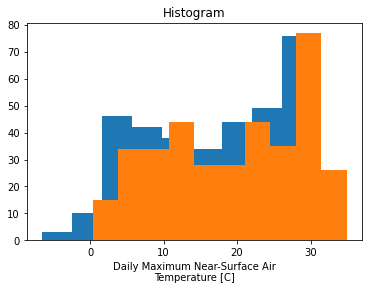

In [4]:
import numpy as np
latNY=np.where(ds['lat'].lat>=40.6) #I am selecting in the dataset the latitude and longitude of New York

longNY = np.where(ds['lon'].lon>=285.96)
#Because I will not find the exact latitude and Longitude, I use a "greater than" condition, and take the first element, which will be the closest to the latitude and Longitude I am looking for.
latNY =np.asarray(latNY)[0][0]
longNY = np.asarray(longNY)[0][0]
tasmax = ds.tasmax - 273.15 # changing from degree Kelvin to degree Celsius
tasmax2015 = ds2.tasmax - 273.15

tasmax.attrs = ds.tasmax.attrs
tasmax.attrs["units"] = "C"
tasmax2015.attrs = ds2.tasmax.attrs
tasmax2015.attrs["units"] = "C"

temp1d = tasmax.isel(lat=latNY ,lon=longNY)
temp1d2015 = tasmax2015.isel(lat=latNY ,lon=longNY) 


temp1d2015.plot.hist()
temp1d.plot.hist()#plotting the annual temperature variation for New York City, predicted for 2100.


34.321564
34.90396


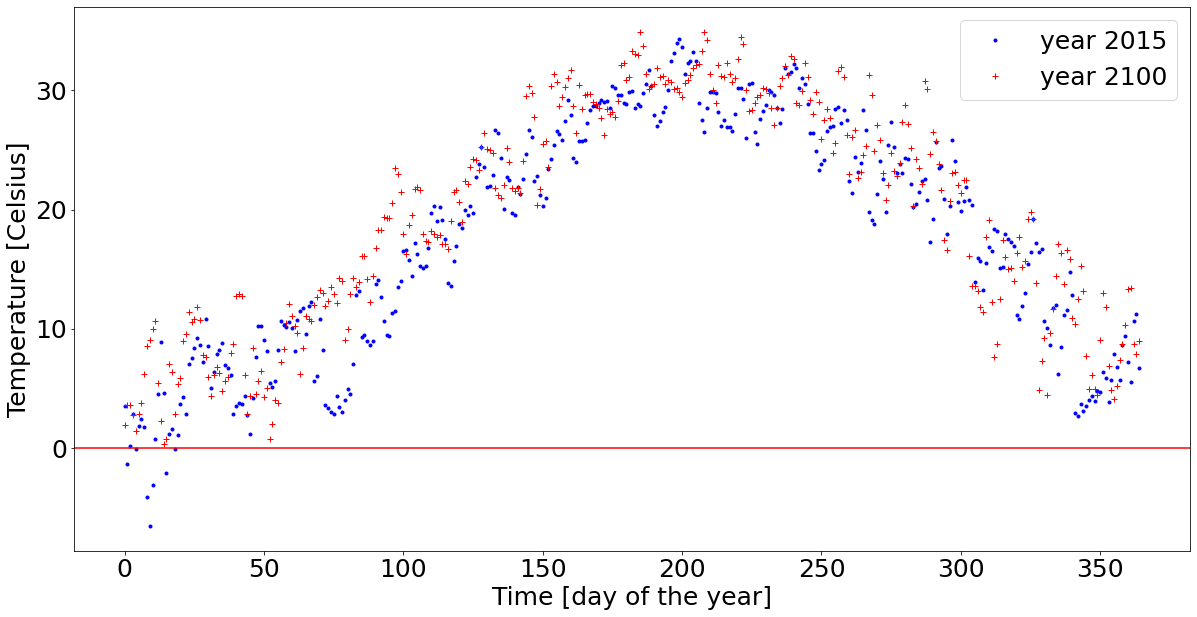

In [5]:
val_2015 = temp1d2015.values
val_2100 = temp1d.values
plt.rcParams['figure.figsize'] = [20, 10] #bigger plot window


plt.plot(val_2015,'b.',label= 'year 2015')
plt.plot(val_2100,'r+',label= 'year 2100')
plt.axline((1, 0), (0, 0),slope=None,color='r')

plt.ylabel('Temperature [Celsius]',fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Time [day of the year]',fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize = 25)
plt.savefig('Temperature_NYC_2015vs2100.png',dpi=400)


print(max(val_2015))
print(max(val_2100))

I want to do a movie to see the annual evolution of the predicted temperature above the US, for the year 2100.
To do so, I select a sub-array of data containing the US. I loop over 365 days, save the figures.
Remark: I am using the colormap "Viridis," which is colorblind-friendly.

In [10]:

for i in range(364):
    ax = plt.axes(projection=ccrs.PlateCarree()) #using Cartopy and the Plate Carree projection
    ax.coastlines() #adding the costlines
    #slicing the dataset over the US
    ds['tasmax'][i].sel(lon=slice(230, 300), lat=slice(20, 60)).plot(cmap='viridis', cbar_kwargs={'shrink': 0.8, 'label': 'Kelvin'})
    
    plt.savefig('Images/carte%03d.png'%(i)) #saving the figures
    plt.clf() #clearing the plot to avoid juxtaposition

for i in range(364):
    ax = plt.axes(projection=ccrs.PlateCarree()) #using Cartopy and the Plate Carree projection
    ax.coastlines() #adding the costlines
    #slicing the dataset over the US
    ds2['tasmax'][i].sel(lon=slice(230, 300), lat=slice(20, 60)).plot(cmap='viridis', cbar_kwargs={'shrink': 0.8, 'label': 'Kelvin'})
    
    plt.savefig('Images2/carte%03d.png'%(i)) #saving the figures
    plt.clf() #clearing the plot to avoid juxtaposition

<Figure size 1440x720 with 0 Axes>

In [11]:
import os
import moviepy.video.io.ImageSequenceClip
from natsort import natsorted
image_folder='Images'
image_folder2='Images2'


fps=24 #frame per second

image_files = [image_folder+'/'+img for img in os.listdir(image_folder) if img.endswith(".png")] #finding the saved pictures
image_files = natsorted(image_files,reverse=False) #Sorting the images in order (chronologicaly from January to December 2100)
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('Carte_video.mp4')

image_files2 = [image_folder2+'/'+img for img in os.listdir(image_folder2) if img.endswith(".png")] #finding the saved pictures
image_files2 = natsorted(image_files2,reverse=False) #Sorting the images in order (chronologicaly from January to December 2100)
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files2, fps=fps)
clip.write_videofile('Carte_video2.mp4')

t:   1%|          | 4/364 [00:00<00:11, 31.89it/s, now=None]

Moviepy - Building video Carte_video.mp4.
Moviepy - Writing video Carte_video.mp4



Moviepy - Done !
Moviepy - video ready Carte_video.mp4


t:   1%|▏         | 5/364 [00:00<00:08, 41.26it/s, now=None]

Moviepy - Building video Carte_video2.mp4.
Moviepy - Writing video Carte_video2.mp4



Moviepy - Done !
Moviepy - video ready Carte_video2.mp4


The video is attached in my repository

In [12]:
from IPython.display import Video

Video("Carte_video.mp4")

First conclusions: In NYC, it appears that the average temperature will reach 30 degrees in summer. It seems that the temperature will be unbearable and companies, the population will probably migrate outside the city.